# Sentinel-2 Alps image matching in different seasons

This notebook demonstrates how to load a pre-trained Named Entity Recognition (NER) model and use it to identify mountain names in example sentences.

In [179]:
import os
from algorithms import *
import logging
from matplotlib import pyplot as plt
import cv2

In [180]:
# Define paths to the images to be processed (B04 channel)
# image_02_path = 'Alps_dataset_2024/B04/T32TNS_20240215T102029_B04_10m.png'
# image_03_path = 'Alps_dataset_2024/B04/T32TNS_20240311T101831_B04_10m.png'
# image_07_path = 'Alps_dataset_2024/B04/T32TNS_20240709T102031_B04_10m.png'
# image_08_path = 'Alps_dataset_2024/B04/T32TNS_20240828T102021_B04_10m.png'
# image_10_path = 'Alps_dataset_2024/B04/T32TNS_20241002T101749_B04_10m.png'

# Define paths to the images to be processed (TCI channel)
image_02_path = 'Alps_dataset_2024/TCI/T32TNS_20240215T102029_TCI_10m.png'
image_03_path = 'Alps_dataset_2024/TCI/T32TNS_20240311T101831_TCI_10m.png'
image_07_path = 'Alps_dataset_2024/TCI/T32TNS_20240709T102031_TCI_10m.png'
image_08_path = 'Alps_dataset_2024/TCI/T32TNS_20240828T102021_TCI_10m.png'
image_10_path = 'Alps_dataset_2024/TCI/T32TNS_20241002T101749_TCI_10m.png'



In [181]:
from matching_inference import main
from matching_inference import draw_matches, draw_matches_ransac

In [182]:
sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)

# Extract keypoints and descriptors using SIFT
siftkeypoints1, siftdescriptors1 = sift_matcher.find_keypoints_and_descriptors(image1)
siftkeypoints2, siftdescriptors2 = sift_matcher.find_keypoints_and_descriptors(image2)

# Extract keypoints and descriptors using ORB
orbkeypoints1, orbdescriptors1 = orb_matcher.find_keypoints_and_descriptors(image1)
orbkeypoints2, orbdescriptors2 = orb_matcher.find_keypoints_and_descriptors(image2)

# Match descriptors using SIFT and ORB
good_matches_sift = sift_matcher.match(siftdescriptors1, siftdescriptors2)
good_matches_orb = orb_matcher.match(orbdescriptors1, orbdescriptors2)

# Image matching 08/24 and 10/24 (Summer and Autumn)

SIFT: Matches - 106, Time - 4.80 seconds
ORB: Matches - 147, Time - 0.23 seconds


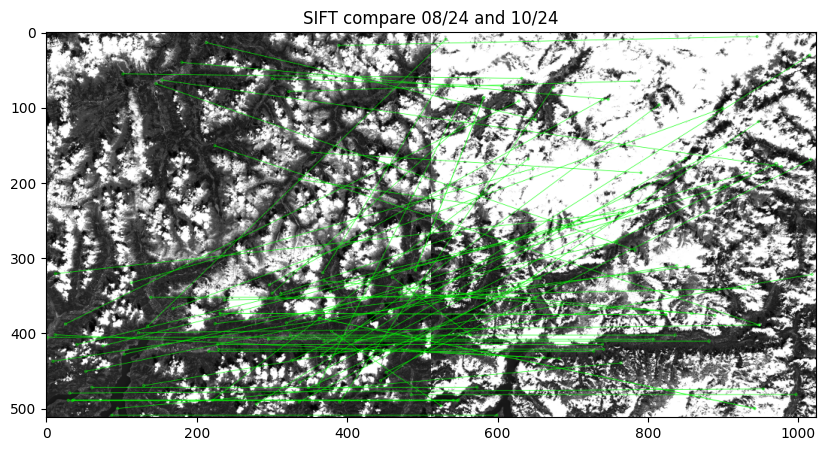

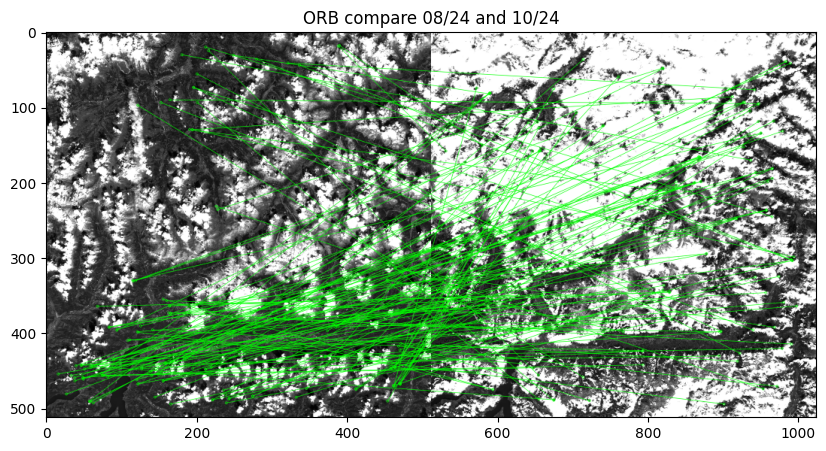

In [184]:
# Load the images using OpenCV

image1 = cv2.imread(image_08_path)
image2 = cv2.imread(image_10_path)

sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)

print(f"SIFT: Matches - {sift_performance[0]}, Time - {sift_performance[1]:.2f} seconds")
print(f"ORB: Matches - {orb_performance[0]}, Time - {orb_performance[1]:.2f} seconds")

# Draw matches for SIFT and ORB
draw_matches(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift, 'SIFT compare 08/24 and 10/24')
draw_matches(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb, 'ORB compare 08/24 and 10/24')

# Image matching 02/24 and 03/24 (Winter and Spring)

SIFT: Matches - 56, Time - 1.36 seconds
ORB: Matches - 117, Time - 0.12 seconds


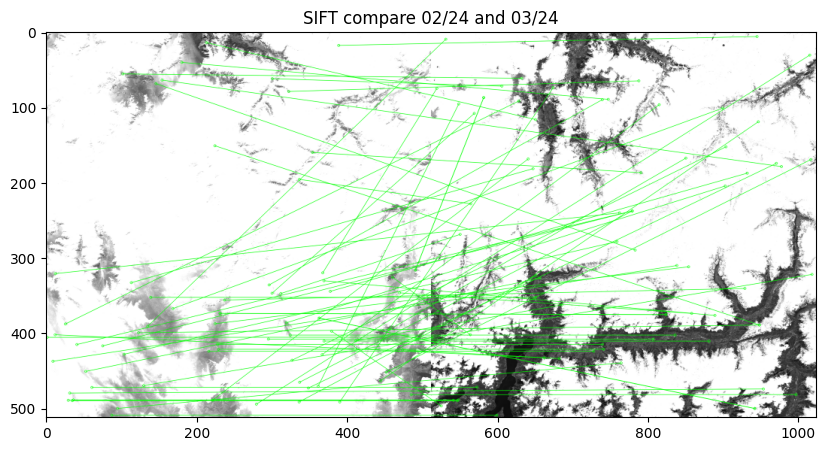

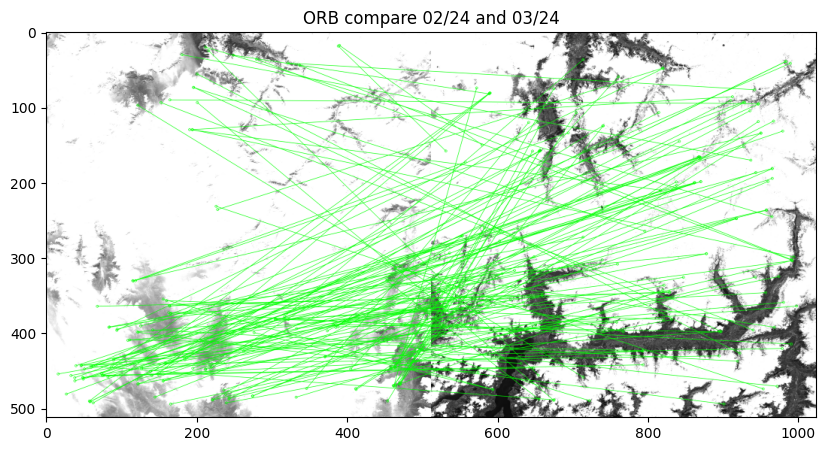

In [186]:
image1 = cv2.imread(image_02_path)
image2 = cv2.imread(image_03_path)

sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)

print(f"SIFT: Matches - {sift_performance[0]}, Time - {sift_performance[1]:.2f} seconds")
print(f"ORB: Matches - {orb_performance[0]}, Time - {orb_performance[1]:.2f} seconds")

draw_matches(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift, 'SIFT compare 02/24 and 03/24')
draw_matches(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb, 'ORB compare 02/24 and 03/24')

# Image matching 02/24 and 08/24 (Winter and Summer)

SIFT: Matches - 31, Time - 1.90 seconds
ORB: Matches - 105, Time - 0.15 seconds


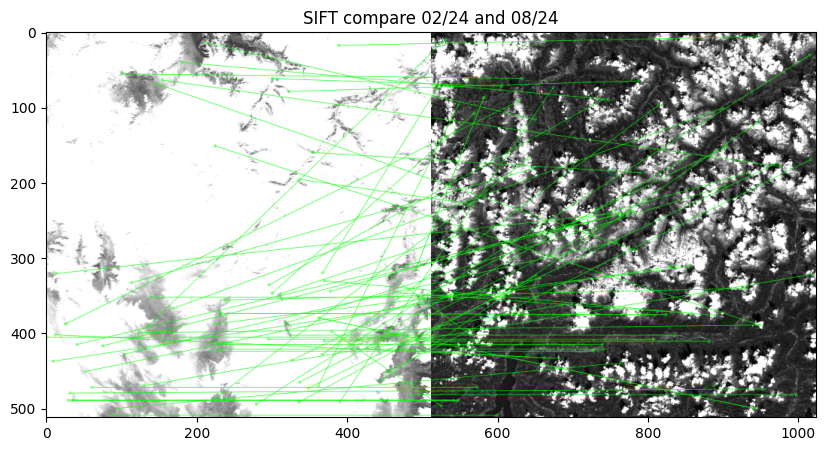

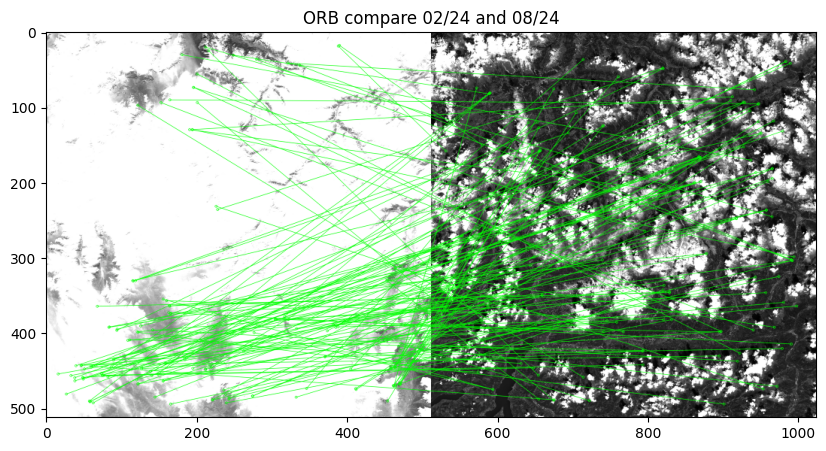

In [188]:
image1 = cv2.imread(image_02_path)
image2 = cv2.imread(image_08_path)

sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)

print(f"SIFT: Matches - {sift_performance[0]}, Time - {sift_performance[1]:.2f} seconds")
print(f"ORB: Matches - {orb_performance[0]}, Time - {orb_performance[1]:.2f} seconds")

draw_matches(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift, 'SIFT compare 02/24 and 08/24')
draw_matches(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb, 'ORB compare 02/24 and 08/24')

# Image matching 02/24 and 08/24 (Winter and Summer)

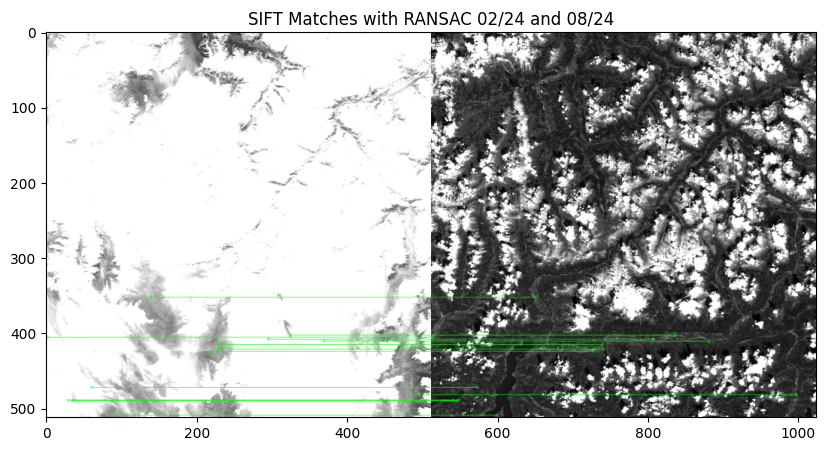

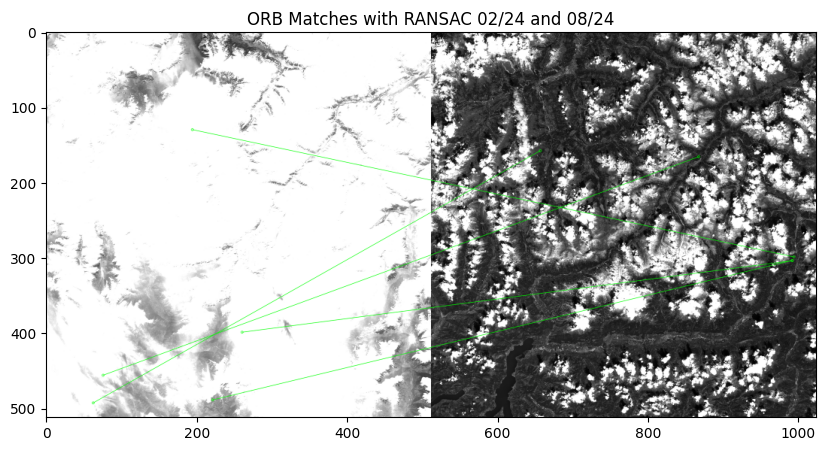

In [190]:
# Draw matches with RANSAC filtering for SIFT and ORB
draw_matches_ransac(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift,
                    'SIFT Matches with RANSAC 02/24 and 08/24')
draw_matches_ransac(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb,
                    'ORB Matches with RANSAC 02/24 and 08/24')

# Image matching 03/24 and 10/24 (Spring and Autumn)

SIFT: Matches - 72, Time - 3.10 seconds
ORB: Matches - 146, Time - 0.17 seconds


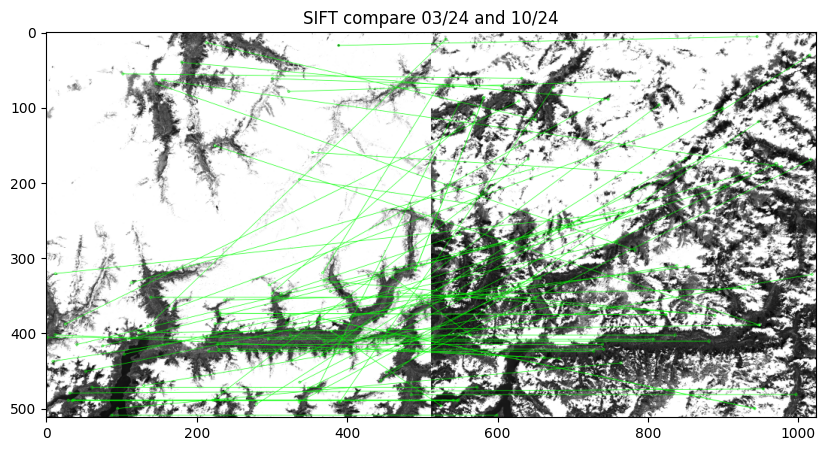

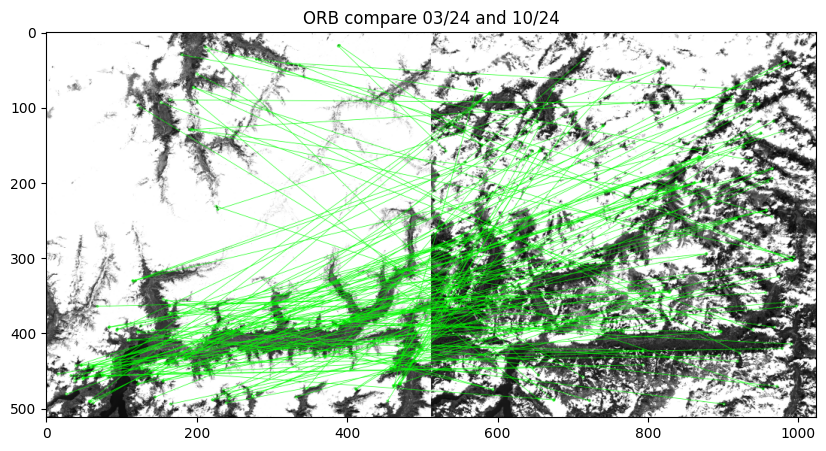

In [192]:
image1 = cv2.imread(image_03_path)
image2 = cv2.imread(image_10_path)

sift_matcher = SIFTMatcher(ratio_thresh=0.75)
orb_matcher = ORBMatcher(number_of_points=500)

sift_performance = measure_performance(sift_matcher, image1, image2)
orb_performance = measure_performance(orb_matcher, image1, image2)

print(f"SIFT: Matches - {sift_performance[0]}, Time - {sift_performance[1]:.2f} seconds")
print(f"ORB: Matches - {orb_performance[0]}, Time - {orb_performance[1]:.2f} seconds")

# Draw matches for SIFT and ORB
draw_matches(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift, 'SIFT compare 03/24 and 10/24')
draw_matches(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb, 'ORB compare 03/24 and 10/24')

# Image matching 03/24 and 10/24 (Spring and Autumn)

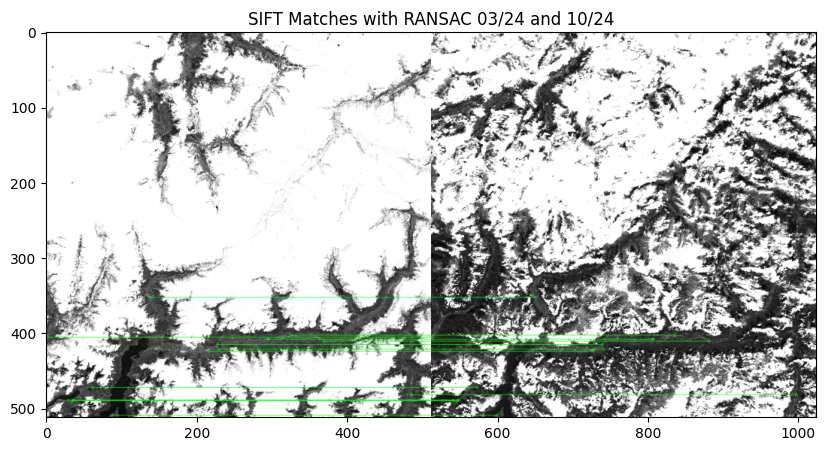

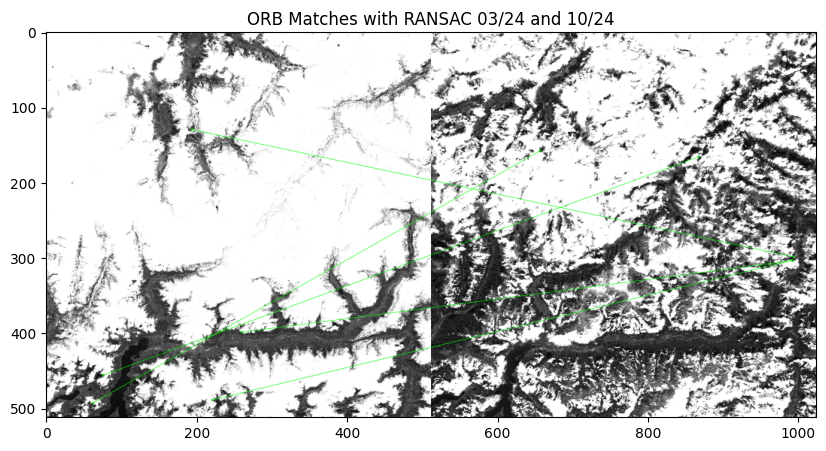

In [194]:
draw_matches_ransac(image1, siftkeypoints1, image2, siftkeypoints2, good_matches_sift,
                    'SIFT Matches with RANSAC 03/24 and 10/24')
draw_matches_ransac(image1, orbkeypoints1, image2, orbkeypoints2, good_matches_orb,
                    'ORB Matches with RANSAC 03/24 and 10/24')

# Conclusion:

- ORB proved to be the better method for fast and efficient comparison of Sentinel-2 satellite images across different seasons. It produced more matches between images and worked significantly faster than SIFT.
- SIFT provides fewer matches and operates more slowly but can be useful in more complex conditions or for more precise matching.
- RANSAC effectively improves the quality of matches, especially for images with significant seasonal changes.

This difference in results may be due to substantial changes in the landscape's appearance caused by seasonal variations, which affect the effectiveness of keypoint matching, especially for images with differing lighting conditions, vegetation coverage, and snow conditions.